Хреняков С. В. БФБО-04-21

In [1]:
print("Вариант:", sum([ord(x) for x in u'Седых']) % 3 + 1)

Вариант: 3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, poisson, binom, norm

In [3]:
a_min = 75
a_max = 90
b_min = 500
b_max = 600
p1 = 0.1
p2 = 0.01
p3 = 0.3

In [4]:
class Model_1:
    def __init__(self, a_min, a_max, b_min, b_max, p1, p2, p3, limit=False):
        self.a_min = a_min
        self.a_max = a_max
        self.b_min = b_min
        self.b_max = b_max
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.limit = limit

    def sample_a(self):
        return np.random.uniform(self.a_min, self.a_max)

    def sample_b(self):
        return np.random.uniform(self.b_min, self.b_max)

    def sample_c(self, a, b):
        c_a = np.random.binomial(a, self.p1)
        c_b = np.random.binomial(b, self.p2)
        c = c_a + c_b
        if self.limit:
            c = np.clip(c, 0, self.a_max + self.b_max)
        return c

    def sample_d(self, c):
        c = max(c, 1e-8)  # Минимальное значение для c, чтобы избежать ошибок
        din_sample = np.random.negative_binomial(c, self.p3)
        d = c + din_sample
        if self.limit:
            d = np.clip(d, 0, 2 * (self.a_max + self.b_max))
        return d

    def joint_probability(self):
        a = self.sample_a()
        b = self.sample_b()
        c = self.sample_c(a, b)
        d = self.sample_d(c)
        return a, b, c, d

    def generate_samples(self, n_samples):
        samples = [self.joint_probability() for _ in range(n_samples)]
        return pd.DataFrame(samples, columns=['a', 'b', 'c', 'd'])


class Model_2(Model_1):
    def sample_c(self, a, b):
        mean = a * self.p1 + b * self.p2
        c = np.random.poisson(mean)
        if self.limit:
            c = np.clip(c, 0, self.a_max + self.b_max)
        return c

    def sample_d(self, c):
        c = max(c, 1e-8)  # Минимальное значение для c, чтобы избежать ошибок
        bin_sample = np.random.binomial(c, self.p3)
        d = c + bin_sample
        if self.limit:
            d = np.clip(d, 0, 2 * (self.a_max + self.b_max))
        return d

In [ ]:

model_1 = Model_1(a_min = a_min, a_max = a_max, b_min = b_min, b_max = b_max, p1 = p1, p2 = p2, p3 = p3, limit = True)
model_2 = Model_2(a_min = a_min, a_max = a_max, b_min = b_min, b_max = b_max, p1 = p1, p2 = p2, p3 = p3, limit = True)

#*№1*

Статистики для Model_1:
              a           b          c          d
mean  82.475861  547.834475  13.510000  44.534000
std    4.310170   28.984056   3.610393  15.553223


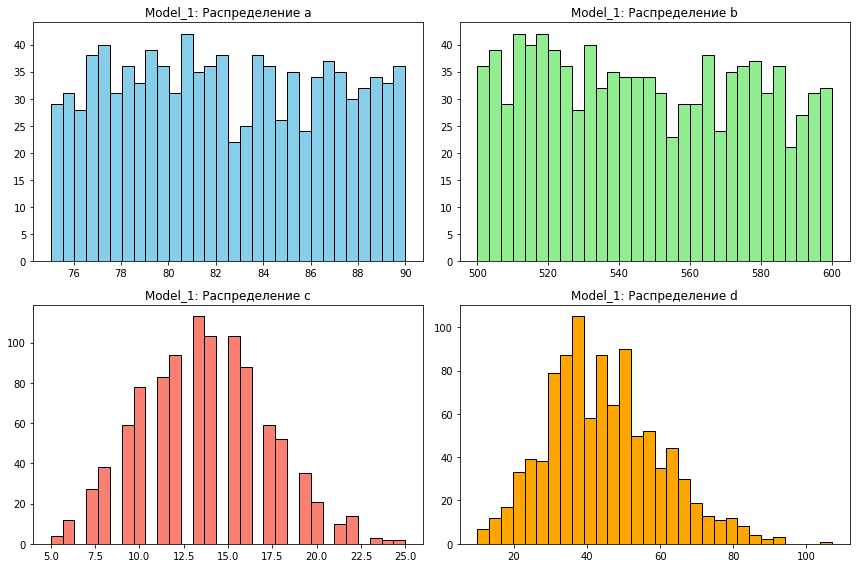




Статистики для Model_2:
              a           b          c          d
mean  82.170733  549.682758  13.749000  17.889000
std    4.332343   29.362894   3.525681   4.836121


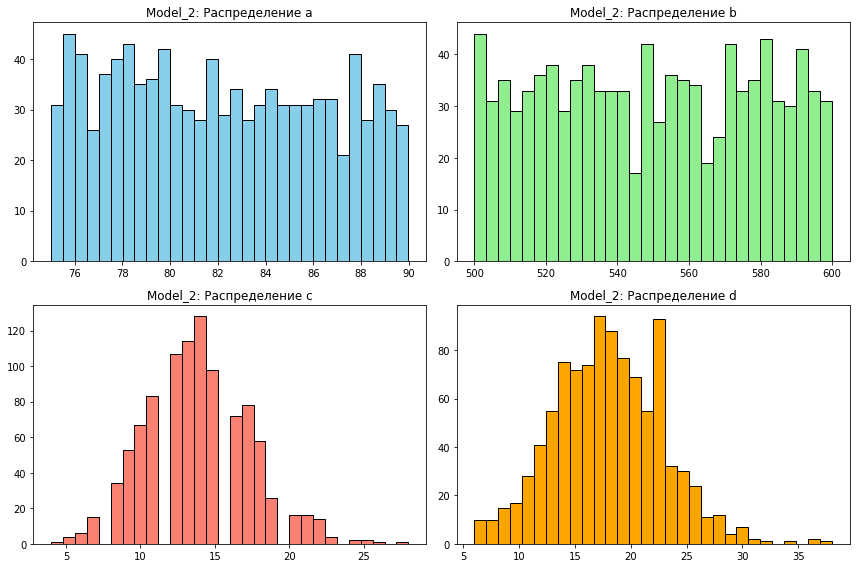

In [6]:
samples_model_1 = model_1.generate_samples(1000)
stats_model_1 = samples_model_1.describe().loc[['mean', 'std']]
# Вывод статистик
print("Статистики для Model_1:")
print(stats_model_1)

# Построение гистограмм
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(samples_model_1['a'], bins=30, color='skyblue', edgecolor='black')
plt.title('Model_1: Распределение a')

plt.subplot(2, 2, 2)
plt.hist(samples_model_1['b'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Model_1: Распределение b')

plt.subplot(2, 2, 3)
plt.hist(samples_model_1['c'], bins=30, color='salmon', edgecolor='black')
plt.title('Model_1: Распределение c')

plt.subplot(2, 2, 4)
plt.hist(samples_model_1['d'], bins=30, color='orange', edgecolor='black')
plt.title('Model_1: Распределение d')

plt.tight_layout()
plt.show()


samples_model_2 = model_2.generate_samples(1000)
stats_model_2 = samples_model_2.describe().loc[['mean', 'std']]
# Вывод статистик
print("\n\n\nСтатистики для Model_2:")
print(stats_model_2)

# Построение гистограмм
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(samples_model_2['a'], bins=30, color='skyblue', edgecolor='black')
plt.title('Model_2: Распределение a')

plt.subplot(2, 2, 2)
plt.hist(samples_model_2['b'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Model_2: Распределение b')

plt.subplot(2, 2, 3)
plt.hist(samples_model_2['c'], bins=30, color='salmon', edgecolor='black')
plt.title('Model_2: Распределение c')

plt.subplot(2, 2, 4)
plt.hist(samples_model_2['d'], bins=30, color='orange', edgecolor='black')
plt.title('Model_2: Распределение d')

plt.tight_layout()
plt.show()

#*№2*

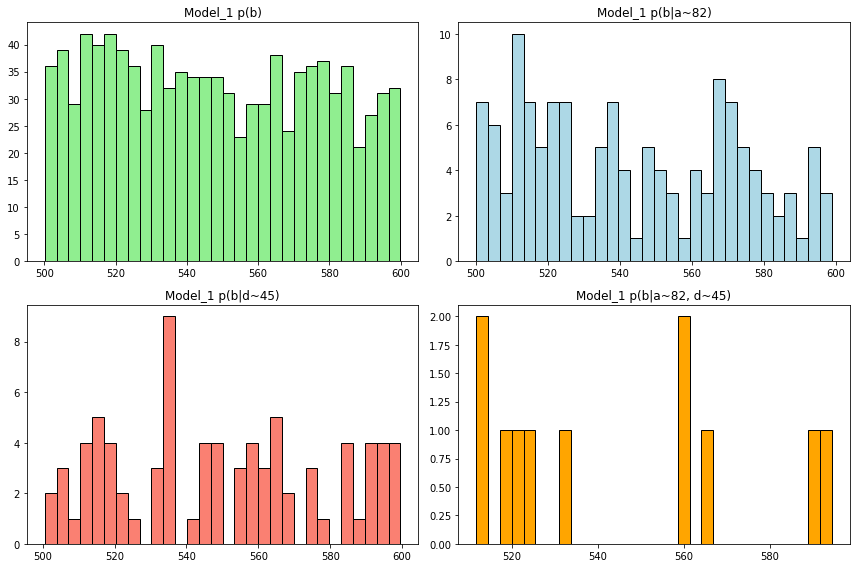


Model_1:
Мат. ожидание и дисперсия p(b): 547.8344749837722, 840.0755255624179
Мат. ожидание и дисперсия p(b|a~82): 543.2783226657039, 837.6268249825512
Мат. ожидание и дисперсия p(b|d~45): 549.814419385884, 850.7263343779789
Мат. ожидание и дисперсия p(b|a~82, d~45): 544.7830234921258, 956.3128287877902






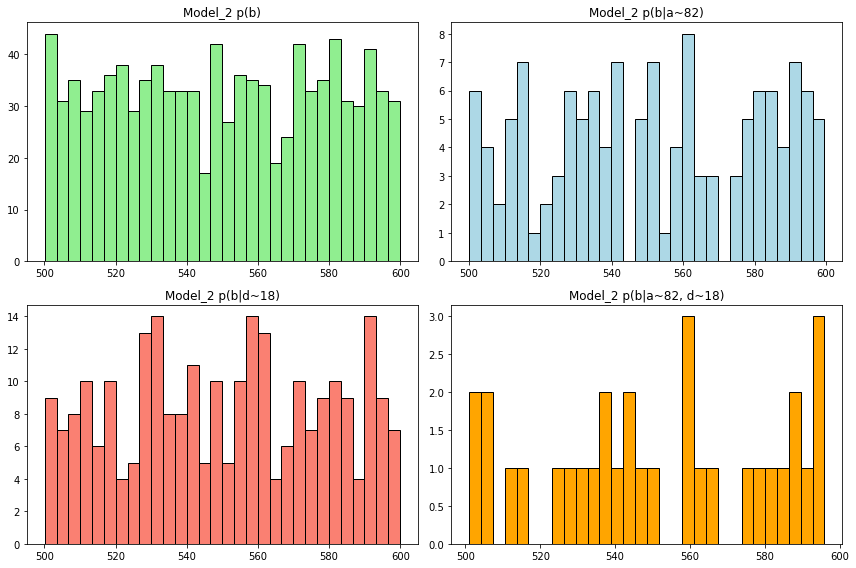


Model_2:
Мат. ожидание и дисперсия p(b): 549.6827580219868, 862.1795378704236
Мат. ожидание и дисперсия p(b|a~82): 551.7667743438058, 893.1663552229815
Мат. ожидание и дисперсия p(b|d~18): 550.4355453098133, 811.4335956009544
Мат. ожидание и дисперсия p(b|a~82, d~18): 551.4890842250136, 898.1982339004832


In [7]:
# 1. Вычисление мат. ожиданий для a и d
mean_a = round(stats_model_1.loc['mean', 'a'])
mean_d = round(stats_model_1.loc['mean', 'd'])

# 2. Функция для условного распределения b по a с диапазоном
def conditional_b_given_a_range(samples, a_value, tolerance=1):
    return samples[(samples['a'] >= a_value - tolerance) & (samples['a'] <= a_value + tolerance)]['b']

# 3. Функция для условного распределения b по d с диапазоном
def conditional_b_given_d_range(samples, d_value, tolerance=1):
    return samples[(samples['d'] >= d_value - tolerance) & (samples['d'] <= d_value + tolerance)]['b']

# 4. Функция для совместного распределения b по a и d с диапазонами
def conditional_b_given_a_d_range(samples, a_value, d_value, tolerance_a=1, tolerance_d=1):
    return samples[(samples['a'] >= a_value - tolerance_a) & (samples['a'] <= a_value + tolerance_a) &
                   (samples['d'] >= d_value - tolerance_d) & (samples['d'] <= d_value + tolerance_d)]['b']

# Используем диапазоны вместо точных значений
tolerance = 1

cond_b_given_a_range = conditional_b_given_a_range(samples_model_1, mean_a, tolerance)
cond_b_given_d_range = conditional_b_given_d_range(samples_model_1, mean_d, tolerance)
cond_b_given_a_d_range = conditional_b_given_a_d_range(samples_model_1, mean_a, mean_d, tolerance, tolerance)

# 5. Генерация графиков для распределений p(b), p(b|a), p(b|d), p(b|a, d)
plt.figure(figsize=(12, 8))

# p(b) - априорное распределение
plt.subplot(2, 2, 1)
plt.hist(samples_model_1['b'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Model_1 p(b)')

# p(b|a)
plt.subplot(2, 2, 2)
plt.hist(cond_b_given_a_range, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Model_1 p(b|a~{mean_a})')

# p(b|d)
plt.subplot(2, 2, 3)
plt.hist(cond_b_given_d_range, bins=30, color='salmon', edgecolor='black')
plt.title(f'Model_1 p(b|d~{mean_d})')

# p(b|a, d)
plt.subplot(2, 2, 4)
plt.hist(cond_b_given_a_d_range, bins=30, color='orange', edgecolor='black')
plt.title(f'Model_1 p(b|a~{mean_a}, d~{mean_d})')

plt.tight_layout()
plt.show()

# 6. Вычисление мат. ожидания и дисперсии для каждого распределения
mean_b = samples_model_1['b'].mean()
var_b = samples_model_1['b'].var()

mean_b_given_a_range = cond_b_given_a_range.mean()
var_b_given_a_range = cond_b_given_a_range.var()

mean_b_given_d_range = cond_b_given_d_range.mean()
var_b_given_d_range = cond_b_given_d_range.var()

mean_b_given_a_d_range = cond_b_given_a_d_range.mean()
var_b_given_a_d_range = cond_b_given_a_d_range.var()

print("\nModel_1:")
# Вывод значений
print(f"Мат. ожидание и дисперсия p(b): {mean_b}, {var_b}")
print(f"Мат. ожидание и дисперсия p(b|a~{mean_a}): {mean_b_given_a_range}, {var_b_given_a_range}")
print(f"Мат. ожидание и дисперсия p(b|d~{mean_d}): {mean_b_given_d_range}, {var_b_given_d_range}")
print(f"Мат. ожидание и дисперсия p(b|a~{mean_a}, d~{mean_d}): {mean_b_given_a_d_range}, {var_b_given_a_d_range}")
print("\n\n\n")






# 1. Вычисление мат. ожиданий для a и d
mean_a = round(stats_model_2.loc['mean', 'a'])
mean_d = round(stats_model_2.loc['mean', 'd'])

# 2. Функция для условного распределения b по a с диапазоном
def conditional_b_given_a_range(samples, a_value, tolerance=1):
    return samples[(samples['a'] >= a_value - tolerance) & (samples['a'] <= a_value + tolerance)]['b']

# 3. Функция для условного распределения b по d с диапазоном
def conditional_b_given_d_range(samples, d_value, tolerance=1):
    return samples[(samples['d'] >= d_value - tolerance) & (samples['d'] <= d_value + tolerance)]['b']

# 4. Функция для совместного распределения b по a и d с диапазонами
def conditional_b_given_a_d_range(samples, a_value, d_value, tolerance_a=1, tolerance_d=1):
    return samples[(samples['a'] >= a_value - tolerance_a) & (samples['a'] <= a_value + tolerance_a) &
                   (samples['d'] >= d_value - tolerance_d) & (samples['d'] <= d_value + tolerance_d)]['b']

# Используем диапазоны вместо точных значений
tolerance = 1

cond_b_given_a_range = conditional_b_given_a_range(samples_model_2, mean_a, tolerance)
cond_b_given_d_range = conditional_b_given_d_range(samples_model_2, mean_d, tolerance)
cond_b_given_a_d_range = conditional_b_given_a_d_range(samples_model_2, mean_a, mean_d, tolerance, tolerance)

# 5. Генерация графиков для распределений p(b), p(b|a), p(b|d), p(b|a, d)
plt.figure(figsize=(12, 8))

# p(b) - априорное распределение
plt.subplot(2, 2, 1)
plt.hist(samples_model_2['b'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Model_2 p(b)')

# p(b|a)
plt.subplot(2, 2, 2)
plt.hist(cond_b_given_a_range, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Model_2 p(b|a~{mean_a})')

# p(b|d)
plt.subplot(2, 2, 3)
plt.hist(cond_b_given_d_range, bins=30, color='salmon', edgecolor='black')
plt.title(f'Model_2 p(b|d~{mean_d})')

# p(b|a, d)
plt.subplot(2, 2, 4)
plt.hist(cond_b_given_a_d_range, bins=30, color='orange', edgecolor='black')
plt.title(f'Model_2 p(b|a~{mean_a}, d~{mean_d})')

plt.tight_layout()
plt.show()

# 6. Вычисление мат. ожидания и дисперсии для каждого распределения
mean_b = samples_model_2['b'].mean()
var_b = samples_model_2['b'].var()

mean_b_given_a_range = cond_b_given_a_range.mean()
var_b_given_a_range = cond_b_given_a_range.var()

mean_b_given_d_range = cond_b_given_d_range.mean()
var_b_given_d_range = cond_b_given_d_range.var()

mean_b_given_a_d_range = cond_b_given_a_d_range.mean()
var_b_given_a_d_range = cond_b_given_a_d_range.var()

# Вывод значений
print("\nModel_2:")
print(f"Мат. ожидание и дисперсия p(b): {mean_b}, {var_b}")
print(f"Мат. ожидание и дисперсия p(b|a~{mean_a}): {mean_b_given_a_range}, {var_b_given_a_range}")
print(f"Мат. ожидание и дисперсия p(b|d~{mean_d}): {mean_b_given_d_range}, {var_b_given_d_range}")
print(f"Мат. ожидание и дисперсия p(b|a~{mean_a}, d~{mean_d}): {mean_b_given_a_d_range}, {var_b_given_a_d_range}")

#*№3*

Model 1: 


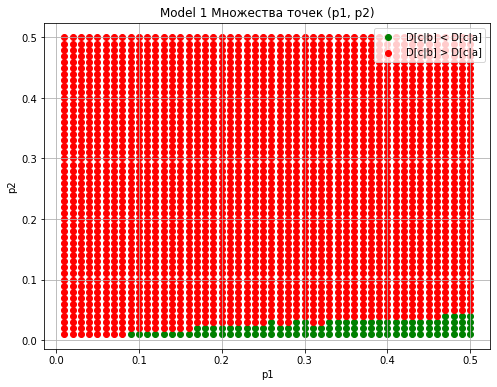

Линейная разделимость: 0.9596 -  True



Model 2: 


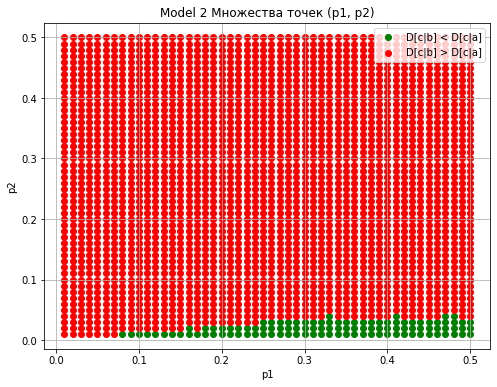

Линейная разделимость: 0.9572 -  True


In [8]:
print("Model 1: ")

# 1. Вычисление мат. ожиданий для a и b
mean_a = round(stats_model_1.loc['mean', 'a'])
mean_b = round(stats_model_1.loc['mean', 'b'])

# 2. Функция для вычисления c в зависимости от a и b
def calculate_c(a, b, p1, p2):
    c_a = np.random.binomial(a, p1, size=1000)  # Генерация выборки для c|a
    c_b = np.random.binomial(b, p2, size=1000)  # Генерация выборки для c|b
    return c_a, c_b

# 3. Поиск множества точек (p1, p2), при которых D[c|b] < D[c|a]
p1_values = np.linspace(0.01, 0.5, 50)
p2_values = np.linspace(0.01, 0.5, 50)

points_D_cb_less_D_ca = []
points_D_cb_greater_D_ca = []

for p1 in p1_values:
    for p2 in p2_values:
        c_a_samples, c_b_samples = calculate_c(mean_a, mean_b, p1, p2)

        D_ca = np.var(c_a_samples)  # Дисперсия c|a
        D_cb = np.var(c_b_samples)  # Дисперсия c|b

        if D_cb < D_ca:
            points_D_cb_less_D_ca.append((p1, p2))
        else:
            points_D_cb_greater_D_ca.append((p1, p2))

# 4. Преобразуем найденные точки в массивы для удобства визуализации
points_D_cb_less_D_ca = np.array(points_D_cb_less_D_ca)
points_D_cb_greater_D_ca = np.array(points_D_cb_greater_D_ca)

# 5. Построение графика множества точек (p1, p2)
plt.figure(figsize=(8, 6))

# Множество точек, где D[c|b] < D[c|a]
plt.scatter(points_D_cb_less_D_ca[:, 0], points_D_cb_less_D_ca[:, 1], color='green', label='D[c|b] < D[c|a]')

# Множество точек, где D[c|b] > D[c|a]
plt.scatter(points_D_cb_greater_D_ca[:, 0], points_D_cb_greater_D_ca[:, 1], color='red', label='D[c|b] > D[c|a]')

# Настройка графика
plt.title('Model 1 Множества точек (p1, p2)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.grid(True)
plt.show()

# 6. Проверка линейной разделимости множеств
from sklearn.svm import SVC

# Создадим набор данных для классификации
X = np.vstack((points_D_cb_less_D_ca, points_D_cb_greater_D_ca))
y = np.hstack((np.zeros(len(points_D_cb_less_D_ca)), np.ones(len(points_D_cb_greater_D_ca))))

# Обучим линейный классификатор
clf = SVC(kernel='linear')
clf.fit(X, y)

# Проверим точность разделения
print(f"Линейная разделимость: { clf.score(X, y) } - ", clf.score(X, y) > 0.95)






print("\n\n\nModel 2: ")
# 1. Вычисление мат. ожиданий для a и b
mean_a = round(stats_model_2.loc['mean', 'a'])
mean_b = round(stats_model_2.loc['mean', 'b'])

# 2. Функция для вычисления c в зависимости от a и b
def calculate_c(a, b, p1, p2):
    c_a = np.random.binomial(a, p1, size=1000)  # Генерация выборки для c|a
    c_b = np.random.binomial(b, p2, size=1000)  # Генерация выборки для c|b
    return c_a, c_b

# 3. Поиск множества точек (p1, p2), при которых D[c|b] < D[c|a]
p1_values = np.linspace(0.01, 0.5, 50)
p2_values = np.linspace(0.01, 0.5, 50)

points_D_cb_less_D_ca = []
points_D_cb_greater_D_ca = []

for p1 in p1_values:
    for p2 in p2_values:
        c_a_samples, c_b_samples = calculate_c(mean_a, mean_b, p1, p2)

        D_ca = np.var(c_a_samples)  # Дисперсия c|a
        D_cb = np.var(c_b_samples)  # Дисперсия c|b

        if D_cb < D_ca:
            points_D_cb_less_D_ca.append((p1, p2))
        else:
            points_D_cb_greater_D_ca.append((p1, p2))

# 4. Преобразуем найденные точки в массивы для удобства визуализации
points_D_cb_less_D_ca = np.array(points_D_cb_less_D_ca)
points_D_cb_greater_D_ca = np.array(points_D_cb_greater_D_ca)

# 5. Построение графика множества точек (p1, p2)
plt.figure(figsize=(8, 6))

# Множество точек, где D[c|b] < D[c|a]
plt.scatter(points_D_cb_less_D_ca[:, 0], points_D_cb_less_D_ca[:, 1], color='green', label='D[c|b] < D[c|a]')

# Множество точек, где D[c|b] > D[c|a]
plt.scatter(points_D_cb_greater_D_ca[:, 0], points_D_cb_greater_D_ca[:, 1], color='red', label='D[c|b] > D[c|a]')

# Настройка графика
plt.title('Model 2 Множества точек (p1, p2)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.grid(True)
plt.show()

# 6. Проверка линейной разделимости множеств
from sklearn.svm import SVC

# Создадим набор данных для классификации
X = np.vstack((points_D_cb_less_D_ca, points_D_cb_greater_D_ca))
y = np.hstack((np.zeros(len(points_D_cb_less_D_ca)), np.ones(len(points_D_cb_greater_D_ca))))

# Обучим линейный классификатор
clf = SVC(kernel='linear')
clf.fit(X, y)

# Проверим точность разделения
print(f"Линейная разделимость: { clf.score(X, y) } - ", clf.score(X, y) > 0.95)

Model 1:


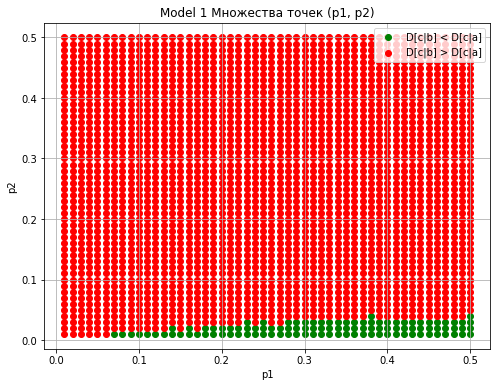

Линейная разделимость: 0.9576 -  True


Model 2:
0.0451505016722408


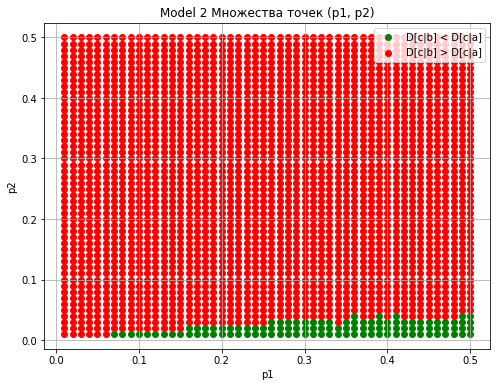

Линейная разделимость: 0.9568 -  True


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Моделирование данных для первой модели
print("Model 1:")

# 1. Вычисление мат. ожиданий для a и b (примерные данные, замените на ваши)
mean_a = round(stats_model_1.loc['mean', 'a'])
mean_b = round(stats_model_1.loc['mean', 'b'])

# 2. Функция для вычисления c в зависимости от a и b
def calculate_c(a, b, p1, p2):
    c_a = np.random.binomial(a, p1, size=1000)  # Генерация выборки для c|a
    c_b = np.random.binomial(b, p2, size=1000)  # Генерация выборки для c|b
    return c_a, c_b

# 3. Поиск множества точек (p1, p2), при которых D[c|b] < D[c|a]
p1_values = np.linspace(0.01, 0.5, 50)
p2_values = np.linspace(0.01, 0.5, 50)

points_D_cb_less_D_ca = []
points_D_cb_greater_D_ca = []

for p1 in p1_values:
    for p2 in p2_values:
        c_a_samples, c_b_samples = calculate_c(mean_a, mean_b, p1, p2)

        D_ca = np.var(c_a_samples)  # Дисперсия c|a
        D_cb = np.var(c_b_samples)  # Дисперсия c|b

        if D_cb < D_ca:
            points_D_cb_less_D_ca.append((p1, p2))
        else:
            points_D_cb_greater_D_ca.append((p1, p2))

# 4. Преобразуем найденные точки в массивы для удобства визуализации
points_D_cb_less_D_ca = np.array(points_D_cb_less_D_ca)
points_D_cb_greater_D_ca = np.array(points_D_cb_greater_D_ca)

# 5. Построение графика множества точек (p1, p2)
plt.figure(figsize=(8, 6))

# Множество точек, где D[c|b] < D[c|a]
plt.scatter(points_D_cb_less_D_ca[:, 0], points_D_cb_less_D_ca[:, 1], color='green', label='D[c|b] < D[c|a]')

# Множество точек, где D[c|b] > D[c|a]
plt.scatter(points_D_cb_greater_D_ca[:, 0], points_D_cb_greater_D_ca[:, 1], color='red', label='D[c|b] > D[c|a]')

# Настройка графика
plt.title('Model 1 Множества точек (p1, p2)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.grid(True)
plt.show()

# 6. Проверка линейной разделимости множеств
X = np.vstack((points_D_cb_less_D_ca, points_D_cb_greater_D_ca))
y = np.hstack((np.zeros(len(points_D_cb_less_D_ca)), np.ones(len(points_D_cb_greater_D_ca))))

# Обучим линейный классификатор
clf = SVC(kernel='linear')
clf.fit(X, y)

# Проверим точность разделения
print(f"Линейная разделимость: {clf.score(X, y)} - ", clf.score(X, y) > 0.95)

# Моделирование данных для второй модели
print("\n\nModel 2:")

mean_a = round(stats_model_2.loc['mean', 'a'])
mean_b = round(stats_model_2.loc['mean', 'b'])

# Поиск множества точек (p1, p2), при которых D[c|b] < D[c|a]
points_D_cb_less_D_ca = []
points_D_cb_greater_D_ca = []

for p1 in p1_values:
    for p2 in p2_values:
        c_a_samples, c_b_samples = calculate_c(mean_a, mean_b, p1, p2)

        D_ca = np.var(c_a_samples)  # Дисперсия c|a
        D_cb = np.var(c_b_samples)  # Дисперсия c|b

        if D_cb < D_ca:
            points_D_cb_less_D_ca.append((p1, p2))
        else:
            points_D_cb_greater_D_ca.append((p1, p2))

# Преобразуем найденные точки в массивы для удобства визуализации
points_D_cb_less_D_ca = np.array(points_D_cb_less_D_ca)
points_D_cb_greater_D_ca = np.array(points_D_cb_greater_D_ca)

# Построение графика множества точек (p1, p2)
plt.figure(figsize=(8, 6))

print(len(points_D_cb_less_D_ca[:, 0])/len(points_D_cb_greater_D_ca[:, 0]))
# Множество точек, где D[c|b] < D[c|a]
plt.scatter(points_D_cb_less_D_ca[:, 0], points_D_cb_less_D_ca[:, 1], color='green', label='D[c|b] < D[c|a]')

# Множество точек, где D[c|b] > D[c|a]
plt.scatter(points_D_cb_greater_D_ca[:, 0], points_D_cb_greater_D_ca[:, 1], color='red', label='D[c|b] > D[c|a]')

# Настройка графика
plt.title('Model 2 Множества точек (p1, p2)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.grid(True)
plt.show()

# Проверка линейной разделимости множеств
X = np.vstack((points_D_cb_less_D_ca, points_D_cb_greater_D_ca))
y = np.hstack((np.zeros(len(points_D_cb_less_D_ca)), np.ones(len(points_D_cb_greater_D_ca))))

# Обучим линейный классификатор
clf = SVC(kernel='linear')
clf.fit(X, y)

# Проверим точность разделения
print(f"Линейная разделимость: {clf.score(X, y)} - ", clf.score(X, y) > 0.95)


#*№4*

In [10]:
import time
import numpy as np
import pandas as pd

# Предполагается, что функции для вычисления conditional_b_given_a, conditional_b_given_d и другие уже реализованы
# Выборки из модели уже созданы: samples_model_1

# 1. Функция для расчета распределения p(c)
def calculate_p_c(samples):
    return samples['c']

# 2. Функция для расчета p(c|a)
def calculate_p_c_given_a(samples, a_value):
    return samples[samples['a'] == a_value]['c']

# 3. Функция для расчета p(c|b)
def calculate_p_c_given_b(samples, b_value):
    return samples[samples['b'] == b_value]['c']

# 4. Функция для расчета p(b|a)
def calculate_p_b_given_a(samples, a_value):
    return samples[samples['a'] == a_value]['b']

# 5. Функция для расчета p(b|d)
def calculate_p_b_given_d(samples, d_value):
    return samples[samples['d'] == d_value]['b']

# 6. Функция для расчета p(b|a, d)
def calculate_p_b_given_a_d(samples, a_value, d_value):
    return samples[(samples['a'] == a_value) & (samples['d'] == d_value)]['b']

# 7. Функция для расчета p(d)
def calculate_p_d(samples):
    return samples['d']

print("Model 1:")
# Временные замеры
mean_a = round(stats_model_1.loc['mean', 'a'])
mean_b = round(stats_model_1.loc['mean', 'b'])
mean_d = round(stats_model_1.loc['mean', 'd'])

# Замер времени для p(c)
start_time = time.time()
p_c = calculate_p_c(samples_model_1)
time_p_c = time.time() - start_time

# Замер времени для p(c|a)
start_time = time.time()
p_c_given_a = calculate_p_c_given_a(samples_model_1, mean_a)
time_p_c_given_a = time.time() - start_time

# Замер времени для p(c|b)
start_time = time.time()
p_c_given_b = calculate_p_c_given_b(samples_model_1, mean_b)
time_p_c_given_b = time.time() - start_time

# Замер времени для p(b|a)
start_time = time.time()
p_b_given_a = calculate_p_b_given_a(samples_model_1, mean_a)
time_p_b_given_a = time.time() - start_time

# Замер времени для p(b|d)
start_time = time.time()
p_b_given_d = calculate_p_b_given_d(samples_model_1, mean_d)
time_p_b_given_d = time.time() - start_time

# Замер времени для p(b|a, d)
start_time = time.time()
p_b_given_a_d = calculate_p_b_given_a_d(samples_model_1, mean_a, mean_d)
time_p_b_given_a_d = time.time() - start_time

# Замер времени для p(d)
start_time = time.time()
p_d = calculate_p_d(samples_model_1)
time_p_d = time.time() - start_time

# Вывод временных замеров
print(f"Время вычисления p(c): {time_p_c:.6f} секунд")
print(f"Время вычисления p(c|a): {time_p_c_given_a:.6f} секунд")
print(f"Время вычисления p(c|b): {time_p_c_given_b:.6f} секунд")
print(f"Время вычисления p(b|a): {time_p_b_given_a:.6f} секунд")
print(f"Время вычисления p(b|d): {time_p_b_given_d:.6f} секунд")
print(f"Время вычисления p(b|a, d): {time_p_b_given_a_d:.6f} секунд")
print(f"Время вычисления p(d): {time_p_d:.6f} секунд")



print("\n\nModel 2:")
# Временные замеры
mean_a = round(stats_model_2.loc['mean', 'a'])
mean_b = round(stats_model_2.loc['mean', 'b'])
mean_d = round(stats_model_2.loc['mean', 'd'])

# Замер времени для p(c)
start_time = time.time()
p_c = calculate_p_c(samples_model_1)
time_p_c = time.time() - start_time

# Замер времени для p(c|a)
start_time = time.time()
p_c_given_a = calculate_p_c_given_a(samples_model_1, mean_a)
time_p_c_given_a = time.time() - start_time

# Замер времени для p(c|b)
start_time = time.time()
p_c_given_b = calculate_p_c_given_b(samples_model_1, mean_b)
time_p_c_given_b = time.time() - start_time

# Замер времени для p(b|a)
start_time = time.time()
p_b_given_a = calculate_p_b_given_a(samples_model_1, mean_a)
time_p_b_given_a = time.time() - start_time

# Замер времени для p(b|d)
start_time = time.time()
p_b_given_d = calculate_p_b_given_d(samples_model_1, mean_d)
time_p_b_given_d = time.time() - start_time

# Замер времени для p(b|a, d)
start_time = time.time()
p_b_given_a_d = calculate_p_b_given_a_d(samples_model_1, mean_a, mean_d)
time_p_b_given_a_d = time.time() - start_time

# Замер времени для p(d)
start_time = time.time()
p_d = calculate_p_d(samples_model_1)
time_p_d = time.time() - start_time

# Вывод временных замеров
print(f"Время вычисления p(c): {time_p_c:.6f} секунд")
print(f"Время вычисления p(c|a): {time_p_c_given_a:.6f} секунд")
print(f"Время вычисления p(c|b): {time_p_c_given_b:.6f} секунд")
print(f"Время вычисления p(b|a): {time_p_b_given_a:.6f} секунд")
print(f"Время вычисления p(b|d): {time_p_b_given_d:.6f} секунд")
print(f"Время вычисления p(b|a, d): {time_p_b_given_a_d:.6f} секунд")
print(f"Время вычисления p(d): {time_p_d:.6f} секунд")

Model 1:
Время вычисления p(c): 0.000000 секунд
Время вычисления p(c|a): 0.000996 секунд
Время вычисления p(c|b): 0.002003 секунд
Время вычисления p(b|a): 0.001000 секунд
Время вычисления p(b|d): 0.001000 секунд
Время вычисления p(b|a, d): 0.000509 секунд
Время вычисления p(d): 0.000000 секунд


Model 2:
Время вычисления p(c): 0.000000 секунд
Время вычисления p(c|a): 0.000998 секунд
Время вычисления p(c|b): 0.001001 секунд
Время вычисления p(b|a): 0.001000 секунд
Время вычисления p(b|d): 0.000999 секунд
Время вычисления p(b|a, d): 0.002001 секунд
Время вычисления p(d): 0.000882 секунд


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Определение диапазонов параметров
a_values = np.linspace(a_min, a_max, 10)
b_values = np.linspace(b_min, b_max, 10)
p1_values = np.linspace(0.01, 1, 10)
p2_values = np.linspace(0.01, 1, 10)
d_values = np.linspace(10, 100, 10)  # Пример диапазона для d (можно адаптировать)

# Для хранения результатов дисперсий
results = []
# Перебор всех комбинаций параметров
for a in a_values:
    for b in b_values:
        for p1 in p1_values:
            for p2 in p2_values:
                for d in d_values:
                    # Генерация выборок для модели 1
                    samples_c_model_1 = []
                    for _ in range(1000):
                        c_model_1 = model_1.sample_c(a, b)
                        d_model_1 = model_1.sample_d(c_model_1)
                        samples_c_model_1.append((c_model_1, d_model_1))

                    # Генерация выборок для модели 2
                    samples_c_model_2 = []
                    for _ in range(1000):
                        c_model_2 = model_2.sample_c(a, b)
                        d_model_2 = model_2.sample_d(c_model_2)
                        samples_c_model_2.append((c_model_2, d_model_2))

                    # Преобразование в массивы
                    samples_c_model_1 = np.array(samples_c_model_1)
                    samples_c_model_2 = np.array(samples_c_model_2)

                    # Вычисление дисперсий для c и d
                    var_c_model_1 = np.var(samples_c_model_1[:, 0])
                    var_d_model_1 = np.var(samples_c_model_1[:, 1])

                    var_c_model_2 = np.var(samples_c_model_2[:, 0])
                    var_d_model_2 = np.var(samples_c_model_2[:, 1])

                    # Запись результатов
                    results.append({
                        'a': a,
                        'b': b,
                        'p1': p1,
                        'p2': p2,
                        'd': d,
                        'var_c_model_1': var_c_model_1,
                        'var_d_model_1': var_d_model_1,
                        'var_c_model_2': var_c_model_2,
                        'var_d_model_2': var_d_model_2
                    })

# Преобразование результатов в DataFrame
df_results = pd.DataFrame(results)

# Визуализация дисперсий для c и d в зависимости от p1 и p2 для моделей 1 и 2

plt.figure(figsize=(14, 10))

# Дисперсия для c (Модель 1)
plt.subplot(2, 2, 1)
plt.scatter(df_results['p1'], df_results['p2'], c=df_results['var_c_model_1'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Дисперсия c (Модель 1)')
plt.title('Дисперсия c от p1 и p2 (Модель 1)')
plt.xlabel('p1')
plt.ylabel('p2')

# Дисперсия для d (Модель 1)
plt.subplot(2, 2, 2)
plt.scatter(df_results['p1'], df_results['p2'], c=df_results['var_d_model_1'], cmap='plasma', edgecolor='k')
plt.colorbar(label='Дисперсия d (Модель 1)')
plt.title('Дисперсия d от p1 и p2 (Модель 1)')
plt.xlabel('p1')
plt.ylabel('p2')

# Дисперсия для c (Модель 2)
plt.subplot(2, 2, 3)
plt.scatter(df_results['p1'], df_results['p2'], c=df_results['var_c_model_2'], cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Дисперсия c (Модель 2)')
plt.title('Дисперсия c от p1 и p2 (Модель 2)')
plt.xlabel('p1')
plt.ylabel('p2')

# Дисперсия для d (Модель 2)
plt.subplot(2, 2, 4)
plt.scatter(df_results['p1'], df_results['p2'], c=df_results['var_d_model_2'], cmap='inferno', edgecolor='k')
plt.colorbar(label='Дисперсия d (Модель 2)')
plt.title('Дисперсия d от p1 и p2 (Модель 2)')
plt.xlabel('p1')
plt.ylabel('p2')

plt.tight_layout()
plt.show()

# Сравнение разницы в дисперсиях для c между моделью 1 и моделью 2
df_results['diff_var_c'] = df_results['var_c_model_1'] - df_results['var_c_model_2']

plt.figure(figsize=(6, 6))
plt.scatter(df_results['p1'], df_results['p2'], c=df_results['diff_var_c'], cmap='RdYlBu', edgecolor='k')
plt.colorbar(label='Разница в дисперсиях c (Модель 1 - Модель 2)')
plt.title('Разница в дисперсиях для c между моделями 1 и 2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.show()

# Сравнение разницы в дисперсиях для d между моделью 1 и моделью 2
df_results['diff_var_d'] = df_results['var_d_model_1'] - df_results['var_d_model_2']

plt.figure(figsize=(6, 6))
plt.scatter(df_results['p1'], df_results['p2'], c=df_results['diff_var_d'], cmap='RdYlGn', edgecolor='k')
plt.colorbar(label='Разница в дисперсиях d (Модель 1 - Модель 2)')
plt.title('Разница в дисперсиях для d между моделями 1 и 2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.show()

In [ ]:
# Генерация выборок c для модели 1
samples_c_model_1 = []
for _ in range(1000):
    a = np.random.uniform(a_min, a_max)
    b = np.random.uniform(b_min, b_max)
    c_model_1 = model_1.sample_c(a, b)
    samples_c_model_1.append(c_model_1)

# Генерация выборок c для модели 2
samples_c_model_2 = []
for _ in range(1000):
    a = np.random.uniform(a_min, a_max)
    b = np.random.uniform(b_min, b_max)
    c_model_2 = model_2.sample_c(a, b)
    samples_c_model_2.append(c_model_2)

# Преобразование в массивы для удобства
samples_c_model_1 = np.array(samples_c_model_1)
samples_c_model_2 = np.array(samples_c_model_2)

# Вычисление дисперсий
var_c_model_1 = np.var(samples_c_model_1)
var_c_model_2 = np.var(samples_c_model_2)

# Вывод результатов
print(f"Дисперсия c в Модели 1: {var_c_model_1}")
print(f"Дисперсия c в Модели 2: {var_c_model_2}")


Дисперсия c в Модели 1: 13.091023999999999
Дисперсия c в Модели 2: 13.675111000000001


*Различие в дисперсиях*:

  Если после выполнения кода дисперсия \( c \) для **модели 1** окажется заметно выше или ниже, чем для **модели 2**, это будет связано с различиями в типе распределений, используемых для генерации \( c \).

#### Причины различий:

1. **Биномиальное распределение (модель 1)**:
   - Биномиальное распределение имеет дисперсию, зависящую от параметров \( a \) и \( b \) как \( \sigma^2 = n \cdot p \cdot (1 - p) \), где \( n \) — количество испытаний, а \( p \) — вероятность успеха.
   - Величина \( c \) в модели 1 является суммой двух биномиальных распределений, что приводит к более сложной зависимости дисперсии от параметров \( a \) и \( b \).

2. **Пуассоновское распределение (модель 2)**:
   - В модели 2 используется пуассоновское распределение, которое имеет особенность: его дисперсия равна математическому ожиданию \( \lambda \). В случае, если сумма \( a \cdot p1 + b \cdot p2 \) будет близка к среднему значению для биномиальных распределений, дисперсия будет ниже, чем в модели 1, поскольку биномиальные распределения часто имеют более высокую дисперсию.

### Вывод:
- В модели 1 дисперсия величины \( c \) может быть больше, чем в модели 2, поскольку биномиальные распределения часто приводят к большей вариативности в данных по сравнению с пуассоновским распределением.
- В модели 2 величина \( c \) генерируется на основе пуассоновского распределения, которое обладает свойством, что его дисперсия равна его математическому ожиданию. Это может приводить к меньшим отклонениям от среднего значения, что снижает дисперсию.

Таким образом, различие в дисперсиях величины \( c \) между моделями объясняется типом распределений, которые используются для генерации данных.